In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
sns.set_style("darkgrid")
from warnings import filterwarnings as w
w('ignore')

In [20]:
dataset = pd.read_csv("car data.csv")
data = dataset.copy()
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### Unique Values of Categorical Variables

In [21]:
data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [22]:
data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [23]:
data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [24]:
data['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

### Plots

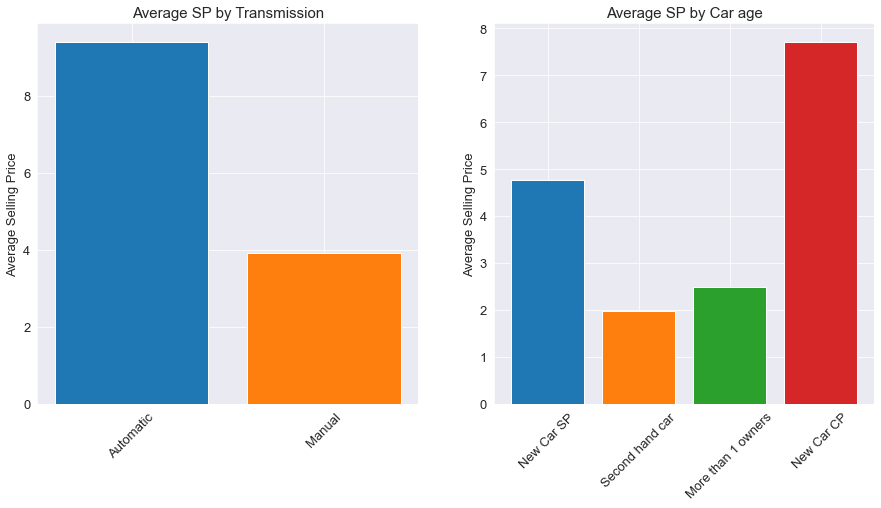

In [25]:
#Plotting various graphs.
#plotting the average selling prices of automatic vs manual
fig = plt.figure(figsize = (15,7))
ax1 = fig.add_subplot(121)
ax1.bar('Automatic',data[data['Transmission']=='Automatic'].Selling_Price.mean())
ax1.bar('Manual',data[data['Transmission']=='Manual'].Selling_Price.mean())
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylabel('Average Selling Price', fontsize = 13)
ax1.set_title('Average SP by Transmission', fontsize = 15)


#average selling price of used cars vs new cars
ax2 = fig.add_subplot(122)
ax2.bar('New Car SP', data[data['Owner']==0].Selling_Price.mean())
ax2.bar('Second hand car',data[data['Owner']==1].Selling_Price.mean())
ax2.bar('More than 1 owners',data[data['Owner']==3].Selling_Price.mean()) #only one car exists in the dataset
ax2.bar('New Car CP', data[data['Owner']==0].Present_Price.mean())
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylabel('Average Selling Price', fontsize = 13)
ax2.set_title('Average SP by Car age', fontsize = 15)
plt.show()



<AxesSubplot:>

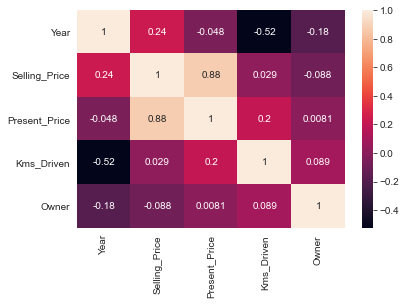

In [26]:
#Correlations
corr_matrix = data.corr()

sns.heatmap(corr_matrix, annot = True)

# Preprocessing

In [27]:
#creating a new columns indicating car age:
data['car_age'] = data['Year'].apply(lambda x: 2020-int(x))
#drop car bought year:
data.drop('Year', axis=1, inplace = True)



target = data['Selling_Price']

#Remove the Car name as it would not play a role in prediction.
data.drop('Car_Name', axis = 1, inplace = True)


#One- HOt Encoding

data = pd.get_dummies(data)
data

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,6,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,7,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,3,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,9,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,6,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,5,0,0,1,1,0,0,1
298,3.35,11.00,87934,0,11,0,0,1,1,0,0,1
299,11.50,12.50,9000,0,3,0,1,0,1,0,0,1


In [28]:
data

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,6,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,7,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,3,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,9,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,6,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,5,0,0,1,1,0,0,1
298,3.35,11.00,87934,0,11,0,0,1,1,0,0,1
299,11.50,12.50,9000,0,3,0,1,0,1,0,0,1


# Model Building

In [29]:
#Split into train and test set
data.drop('Selling_Price', axis = 1, inplace = True)
xtrain, xtest, ytrain, ytest = train_test_split(data,target, test_size = 0.15, random_state = 0)

In [30]:
rf2 =  RandomForestRegressor()
kfold = KFold(n_splits= 5, shuffle = True)
np.mean(cross_val_score(rf2,data,target,cv=kfold))

0.9230794987383663

# Tuning the Model

In [31]:
#Function:
def adjusted_r2(ytest,ypred,xtest):
    adj_r2 = 1-(((1-r2_score(ytest,ypred))*(len(xtest)-1))/(len(xtest)-len(xtest.iloc[0,:])-1))
    return adj_r2

In [32]:
# Grid Search

rf_grid = RandomForestRegressor()
params = {'criterion' : ['mse','mae'], 'n_estimators':[100,300,400,500], 'max_features':['auto','sqrt','log2'], 
          'max_depth':[5,8,10,15,20,None], 'min_impurity_decrease':[0.001,0.01,0.015], 
          'min_impurity_split':[0.001,0.01,0.015]} 
grid_model = GridSearchCV(rf_grid, cv=4, param_grid = params, scoring = 'neg_mean_squared_error')
grid_model.fit(xtrain,ytrain)
print("error after grid search: ", grid_model.best_score_)
print("The parameters given by the grid searchh is:", grid_model.best_params_)


error after grid search:  -2.4454993034056915
The parameters given by the grid searchh is: {'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_impurity_decrease': 0.015, 'min_impurity_split': 0.015, 'n_estimators': 100}


In [33]:
#rf2.fit(xtrain,ytrain)
ypred = grid_model.predict(xtest)
print("r2: ", r2_score(ytest,ypred))
print("adjusted r2:", adjusted_r2(ytest, ypred, xtest))

r2:  0.9471697970707333
adjusted r2: 0.9300776725936176


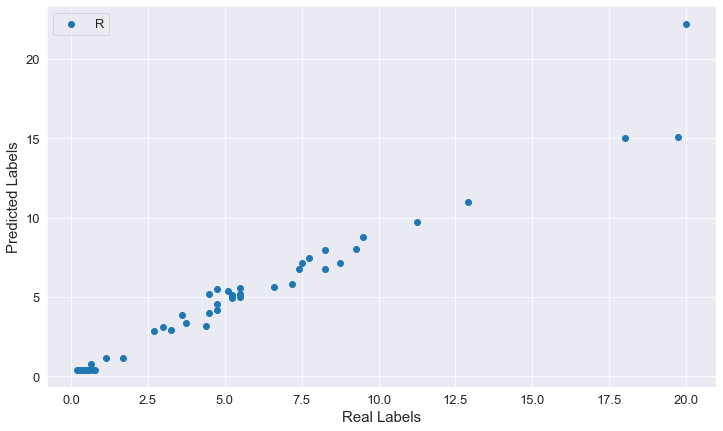

In [34]:
plt.figure(figsize = (12,7))
plt.scatter(ytest,ypred)
plt.xlabel("Real Labels", fontsize = 15)
plt.ylabel("Predicted Labels", fontsize = 15) 
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend("Random Forest", fontsize = 13, loc = 2)
plt.show()

In [35]:
#file  = open('rfmodel.pkl','wb')
#pickle.dump(grid_model, file)

In [36]:
xtrain.head(10)

,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
182,0.58,30000,0,7,0,0,1,0,1,0,1
122,1.17,6000,0,4,0,0,1,0,1,0,1
254,9.90,54242,0,7,0,0,1,1,0,0,1
7,8.61,33429,0,5,0,1,0,1,0,0,1
45,12.04,15000,0,6,0,0,1,1,0,1,0
216,4.43,12500,0,4,0,0,1,1,0,0,1
238,9.40,60241,0,7,0,0,1,1,0,0,1
63,35.96,47000,0,5,0,1,0,1,0,1,0
108,1.50,18000,0,4,0,0,1,0,1,0,1
118,1.47,26000,0,5,0,0,1,0,1,0,1
